In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,SPQ_TOTAL_ESQUIZOT
0,17,5,0,7,5,13,2,20,0,24,4,0
1,13,11,3,6,11,17,11,17,1,22,9,0
2,20,20,20,11,8,3,0,20,1,30,12,1
3,12,1,0,4,6,3,1,18,0,20,4,0
4,8,9,17,4,14,2,6,27,17,35,17,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 85% de los datos para entrenamiento y un 15% de los datos para validación
valid_idx  =  range ( len ( df ) - 43 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_RESPROBL', 'CSI_EVITPROBL', 'CSI_APOYOSOC', 'CAPE_POSIT_FREC', 'TRAUMA_FRECUENCIA', 'CSI_REESTCOGN', 'SCL90_IDEA_PARAN', 'ANSIEDADRASGO', 'CSI_AUTOCRIT', 'CSI_RETISOC', 'CSI_PENSDESID']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.314899 -0.104193 -1.100085 -0.796287 ... -1.483953 -0.913316  0.234189 -0.393056]
 [ 0.091045  1.657115 -1.607336  0.968617 ...  0.504934 -0.031218  2.772834  0.106139]
 [-2.14165  -1.425174 -1.607336 -0.475395 ... -1.330962 -1.089735 -1.458241 -2.057038]
 [ 0.49699  -0.54452   0.759831 -0.154503 ... -0.107031 -0.384057 -0.400472 -1.391445]
 [-2.547595 -1.20501  -1.100085 -0.796287 ... -2.401901 -0.384057 -0.612026 -1.724242]]
[0 1 0 0 1]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.065565,1.032547,0.604651,02:50
1,0.938750,0.949256,0.697674,02:46


CSI_RESPROBL,CSI_EVITPROBL,CSI_APOYOSOC,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,CSI_REESTCOGN,SCL90_IDEA_PARAN,ANSIEDADRASGO,CSI_AUTOCRIT,CSI_RETISOC,CSI_PENSDESID,target,prediction
-0.7208,1.6571,1.6052,-0.1545,-0.3719,-0.3993,-0.8979,0.3519,2.0858,-0.8236,0.7717,0,2
1.5119,-0.5445,-0.0856,-0.3149,-0.9380,1.8312,-0.8979,-0.7190,-0.5605,-0.4005,-1.2250,0,0
-0.3149,0.3361,-0.0856,-0.1545,-0.7493,0.3442,1.2508,0.1990,0.4980,0.2342,0.1061,0,1
-1.5327,2.7579,-1.4383,-0.3149,1.9866,-1.1428,0.0788,-1.0250,-0.3841,2.5613,0.6053,1,1
-1.7357,-1.2050,-1.6073,-0.1545,-0.3719,-1.7004,1.4461,-0.8720,0.4980,1.0804,-1.0586,1,1


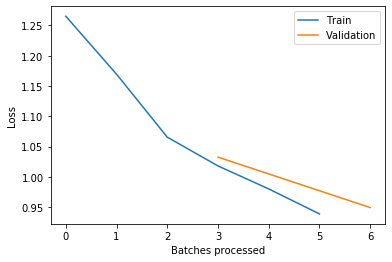

In [10]:
learn.recorder.plot_losses()
learn.show_results()